# Exercise 3

## Problem 3.1

### Some Theory 

When we want to know about $\mu$ in a multiparameter model with parameter $\mu$ and $\sigma^2$, we need the average over the nuisance parameter on the joint posterior distribution (in this case $\sigma^2$).

$p(\mu|y) = \int p(\mu|\sigma^2,y)p(\sigma^2|y) d\sigma^2$

An easy way of doing this in practice is to factor the joint posterior distribution (as is done above) into the conditional posterior distribution on the nuisance parameter and a marginal posterior distribution on the nuisance parameter. Now we can first draw $\sigma^2$ from the marginal posterior distribution, and then use that $\sigma^2$ to draw $\mu$ from the conditional posterior distribution. This indirectly evaluate the integral with respect to $\sigma^2$

how ever while working with the Normal model, and using a noninformative prior distribution such as $(\sigma^2)^{-1}$ the posterior distribution taks on a convinient analytic (closed) form, namely a scaled and translated vertion of the studen's t form:

$\frac{\bar{y}-\mu}{s/\sqrt{n}}|\mu,\sigma^2 \sim t_{n-1}$

this amounts to a studen's $t_{n-1}$, with a translation/location of $\bar{y}$ and scale of $\sqrt{s^2/n}$

### Code base

In [2]:
#magic call
%matplotlib inline
#imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from utilities_and_data import plot_tools, sinvchi2 #this is the N-inv Chi^2 distribution
from scipy import stats

In [3]:
# edit default plot settings
plt.rc('font', size=12)

In [4]:
#sample data
y = np.loadtxt('data/windshieldy1.txt')
n = len(y)
y_mean = np.mean(y)
y_s2 = np.var(y,ddof=1)

### 3.1.a




The mean of the posterior distribution of μ is 14.61
The variance of the posterior distribution of μ is 0.322


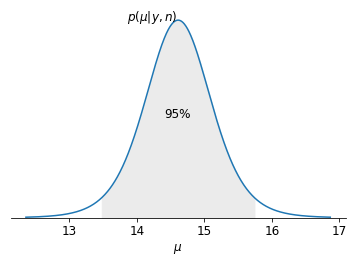

In [23]:
# compute the exact marginal density for mu
# multiplication by 1./sqrt(s2/n) is due to the transformation of variable
# z=(x-mean(y))/sqrt(s2/n), see BDA3 p. 21
pos_dist_mu = stats.t(n-1, loc=y_mean, scale=np.sqrt(y_s2/n))
mean, var = pos_dist_mu.stats('mv')

#create line space (x axis)
x = np.linspace(mean-var*7, mean+var*7, 1000)

pos_pd_mu = pos_dist_mu.pdf(x)
plt.plot(x,pos_pd_mu)

# show only x-axis
plot_tools.modify_axes.only_x()
# annotate the line
plt.annotate(r'$p(μ|y,n)$',
             (x[len(x)//2]-0.015, pos_pd_mu[len(x)//2]),
             ha='right'
            )

x_95 = pos_dist_mu.interval(0.95)
x_95_idx = ((x>x_95[0])&(x<x_95[1]))

plt.fill_between(x[x_95_idx], pos_pd_mu[x_95_idx], color='0.92')
# add text into the shaded area
plt.text(x[np.argmax(pos_pd_mu)],0.4,"95%", horizontalalignment='center')
# add labels and title
plt.xlabel(r'$μ$')

mean, var = pos_dist_mu.stats('mv')

print('\n\n\nThe mean of the posterior distribution of μ is ' + str(np.round(mean,decimals=2)) + '\n' +
      'The variance of the posterior distribution of μ is ' + str(np.round(var,decimals=3)))

We can thus say that $\mu$ takes on a value between 13.47 and 15.74 with a 95% curtanty 

### 3.1.b

working with the Normal model, and using a noninformative prior distribution such as $(\sigma^2)^{-1}$ the posterior predictive distribution also takes on the form of a studen's $t_{n-1}$, but now the translation/location is $\bar{y}$ and the scale is $\sqrt{s^2(1+\frac{1}{n})}$




The mean of the posterior distribution of μ is 14.61
The variance of the posterior distribution of μ is 3.219


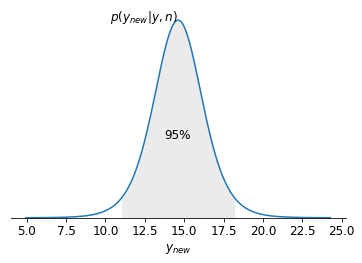

In [37]:
#frees the dist.
pos_pred_dist = stats.t(n-1, loc=y_mean, scale=np.sqrt(y_s2*(1+1/n)))
pred_mean, pred_var = pos_pred_dist.stats('mv')

#create sample space/x-axis
x_pred = np.linspace(pred_mean-pred_var*3, pred_mean+pred_var*3, 1000)

pos_pred_pd = pos_pred_dist.pdf(x_pred)
plt.plot(x_pred,pos_pred_pd)

# show only x-axis
plot_tools.modify_axes.only_x()
# annotate the line
plt.annotate(r'$p(y_{new}|y,n)$',
             (x_pred[len(x)//2]-0.015, pos_pred_pd[len(x)//2]),
             ha='right'
            )

x_pred_95 = pos_pred_dist.interval(0.95)
x_pred_95_idx = ((x_pred>x_pred_95[0])&(x_pred<x_pred_95[1]))

plt.fill_between(x_pred[x_pred_95_idx], pos_pred_pd[x_pred_95_idx], color='0.92')
# add text into the shaded area
plt.text(x_pred[np.argmax(pos_pred_pd)],0.1,"95%", horizontalalignment='center')
# add labels and title
plt.xlabel(r'$y_{new}$')

print('\n\n\nThe mean of the posterior distribution of μ is ' + str(np.round(pred_mean,decimals=2)) + '\n' +
      'The variance of the posterior distribution of μ is ' + str(np.round(pred_var,decimals=3)))

Thus we can say that the hardness of the next windshield lays with in the interval from 11.03 to 18.19 with a 95 percent certainti.

## problem 3.2

### some theory

While working with binomial data, the conjungate prior is a Beta($\alpha,\beta$), and when used the posterior distribution has a closed form as:

$p(p_x|y) \propto \text{Beta}(\alpha+y,\beta+n-y) $

Lets assign $p_0$ as the probability of dieying in the controle groupe, and $p_1$ as the probability of dieying in the treatment group.

We can then sample from the two posteriors and run the samples through the odds function, and that way do inference on the increase of the odds of surviving under the treatment

additional let us use a weakly informative prior Beta(2,20)

### Code base

In [117]:
#freez the distributions
p0_dist = stats.beta(2+39,20+674-39)
p1_dist = stats.beta(2+22,20+680-22)

# create the sample space
x = np.linspace(0, p0_dist.median()*3, 1000)

# draw n random samples from the two distributions
n = 10000
p0 = p0_dist.rvs(n)  # rvs comes from `random variates`
p1 = p1_dist.rvs(n)

# run the odds function 
odd = (p1/(1-p1))/(p0/(1-p0))

### 3.2.a

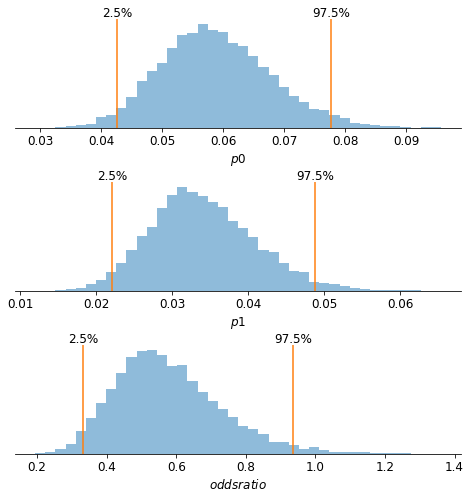

In [124]:
# plot 2 subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
# show only x-axis
plot_tools.modify_axes.only_x(axes)
# manually adjust spacing
fig.subplots_adjust(hspace=0.5)

# plot histogram
axes[0].hist(p0, bins=40, color=plot_tools.lighten('C0'))
# compute 2.5% and 97.5% quantile approximation using samples
p0_25, p0_975 = np.percentile(p0, [2.5, 97.5])
# draw lines for these
axes[0].axvline(p0_25, color='C1')
axes[0].axvline(p0_975, color='C1')
axes[0].text(
    p0_25,
    axes[0].get_ylim()[1]+15,
    '2.5%',
    horizontalalignment='center'
)
axes[0].text(
    p0_975,
    axes[0].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
axes[0].set_xlabel(r'$p0$')

# plot histogram for the transformed variable
axes[1].hist(p1, bins=40, color=plot_tools.lighten('C0'))
# compute 2.5% and 97.5% quantile approximation using samples
p1_25, p1_975 = np.percentile(p1, [2.5, 97.5])
# draw lines for these
axes[1].axvline(p1_25, color='C1')
axes[1].axvline(p1_975, color='C1')
axes[1].text(
    p1_25,
    axes[1].get_ylim()[1]+15,
    '2.5%',
     horizontalalignment='center'
)
axes[1].text(
    p1_975,
    axes[1].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
axes[1].set_xlabel(r'$p1$');

# plot histogram for the transformed variable
axes[2].hist(odd, bins=40, color=plot_tools.lighten('C0'))
# compute 2.5% and 97.5% quantile approximation using samples
odd_25, odd_975 = np.percentile(odd, [2.5, 97.5])
# draw lines for these
axes[2].axvline(odd_25, color='C1')
axes[2].axvline(odd_975, color='C1')
axes[2].text(
    odd_25,
    axes[2].get_ylim()[1]+15,
    '2.5%',
     horizontalalignment='center'
)
axes[2].text(
    odd_975,
    axes[2].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
axes[2].set_xlabel(r'$odds ratio$');

It can then be said that the median-ratio_of_deaths in the treatment group is only 56% of that in the controle group (almost two times lower), and that it is with in the range of 33.2% and 93.5% with a certanty of 95%

### 3.2.b

As the prior that i uses is a factor 10 less percise as the derived posterior, and that it is centered around the mean of the data make it have very little influence. 

## Problem 3.3

### some theory

all is given from problems 3.1 and 3.2

### Code base

In [5]:
#sample data
y1 = np.loadtxt('data/windshieldy1.txt')
n1 = len(y)
y1_mean = np.mean(y)
y1_s2 = np.var(y,ddof=1)

y2 = np.loadtxt('data/windshieldy2.txt')
n2 = len(y)
y2_mean = np.mean(y)
y2_s2 = np.var(y,ddof=1)

In [16]:
#freez the distributions
pos_dist_mu1 = stats.t(n1-1, loc=y1_mean, scale=np.sqrt(y1_s2/n1))
pos_dist_mu2 = stats.t(n2-1, loc=y2_mean, scale=np.sqrt(y2_s2/n2))

#create line space (x axis)
a, b = pos_dist_mu1.stats('mv')
x = np.linspace(a-b*7, a+b*7, 1000)

# draw n random samples from the two distributions
n = 10000
mu1 = pos_dist_mu1.rvs(n)  # rvs comes from `random variates`
mu2 = pos_dist_mu2.rvs(n)

#Do the diff
mu_d = mu1 - mu2

### 3.3.a

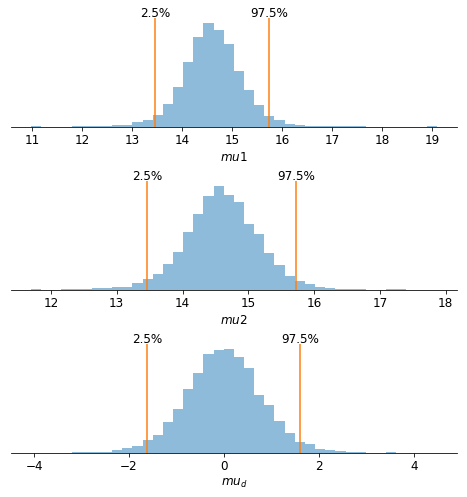

In [15]:
# plot 2 subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
# show only x-axis
plot_tools.modify_axes.only_x(axes)
# manually adjust spacing
fig.subplots_adjust(hspace=0.5)

# plot histogram
axes[0].hist(mu1, bins=40, color=plot_tools.lighten('C0'))
# compute 2.5% and 97.5% quantile approximation using samples
mu1_25, mu1_975 = np.percentile(mu1, [2.5, 97.5])
# draw lines for these
axes[0].axvline(mu1_25, color='C1')
axes[0].axvline(mu1_975, color='C1')
axes[0].text(
    mu1_25,
    axes[0].get_ylim()[1]+15,
    '2.5%',
    horizontalalignment='center'
)
axes[0].text(
    mu1_975,
    axes[0].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
axes[0].set_xlabel(r'$mu1$')

# plot histogram for the transformed variable
axes[1].hist(mu2, bins=40, color=plot_tools.lighten('C0'))
# compute 2.5% and 97.5% quantile approximation using samples
mu2_25, mu2_975 = np.percentile(mu2, [2.5, 97.5])
# draw lines for these
axes[1].axvline(mu2_25, color='C1')
axes[1].axvline(mu2_975, color='C1')
axes[1].text(
    mu2_25,
    axes[1].get_ylim()[1]+15,
    '2.5%',
     horizontalalignment='center'
)
axes[1].text(
    mu2_975,
    axes[1].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
axes[1].set_xlabel(r'$mu2$');

# plot histogram for the transformed variable
axes[2].hist(mu_d, bins=40, color=plot_tools.lighten('C0'))
# compute 2.5% and 97.5% quantile approximation using samples
mu_d_25, mu_d_975 = np.percentile(mu_d, [2.5, 97.5])
# draw lines for these
axes[2].axvline(mu_d_25, color='C1')
axes[2].axvline(mu_d_975, color='C1')
axes[2].text(
    mu_d_25,
    axes[2].get_ylim()[1]+15,
    '2.5%',
     horizontalalignment='center'
)
axes[2].text(
    mu_d_975,
    axes[2].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
axes[2].set_xlabel(r'$mu_d$');

The median of mu_d is -0.00014 and the 95% confidence interval is almost symetric around 0 at [-1.6106, 1.6101]

### 3.3.b

As 0 is will with in the bounds of the 95% interval we can say that there is no evidence that the two product lines produces different hardness 